# Applying ResNet model

In [2]:
import os
import matplotlib.pyplot as plt
import clip
import torch
from torchvision.datasets import CIFAR100
import numpy as np
import PIL
%matplotlib inline

#Had OpenMPI issue
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%load_ext autoreload
%autoreload 2

## First test with constellation image

In [3]:
# Load constellations and pick one
from dataUtils import * 
pictures = loadConstellations(pictureTypes=["original", "final_easy", "outline"])

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

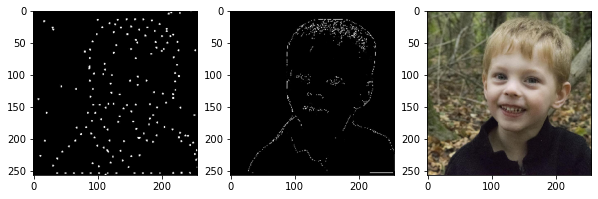

In [4]:
### Visualize selected image and its original
imageIdx = 24
objectId = list(pictures.keys())[imageIdx]
constellationImage = pictures[objectId]["final_easy"][0]
outlineImage = pictures[objectId]["outline"][0]
originalImage = pictures[objectId]["original"][0]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
ax1.imshow(constellationImage)
ax2.imshow(outlineImage)
ax3.imshow(originalImage)

In [19]:
# Load the model
model = torch.hub.load('pytorch/vision:v0.8.2', 'resnet18', pretrained=True)
#model = torch.hub.load('pytorch/vision:v0.8.2', 'resnet34', pretrained=True)
#model = torch.hub.load('pytorch/vision:v0.8.2', 'resnet50', pretrained=True)
#model = torch.hub.load('pytorch/vision:v0.8.2', 'resnet101', pretrained=True)
#model = torch.hub.load('pytorch/vision:v0.8.2', 'resnet152', pretrained=True)
model.eval()

Using cache found in C:\Users\Heigo Ers/.cache\torch\hub\pytorch_vision_v0.8.2
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Heigo Ers/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
# Read the categories of imagenet
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

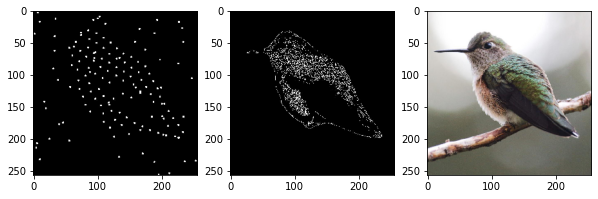


Top predictions for outline :

matchstick, 8.57%
volcano, 4.42%
flatworm, 4.18%
bubble, 3.73%
lampshade, 3.54%

Top predictions for final_easy :

spotlight, 44.47%
bubble, 9.95%
fountain, 3.48%
spider web, 3.22%
traffic light, 2.19%

Top predictions for original :

hummingbird, 99.84%
jacamar, 0.14%
bee eater, 0.01%
weevil, 0.01%
bulbul, 0.0%


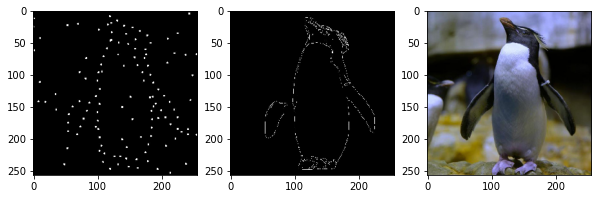


Top predictions for outline :

barn spider, 50.38%
spider web, 32.84%
garden spider, 6.13%
black and gold garden spider, 5.66%
black widow, 3.68%

Top predictions for final_easy :

spotlight, 44.13%
traffic light, 4.41%
pole, 4.25%
spider web, 3.51%
bubble, 3.46%

Top predictions for original :

king penguin, 99.81%
water ouzel, 0.03%
magpie, 0.02%
jay, 0.02%
quail, 0.02%


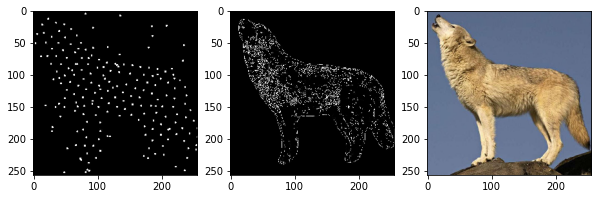


Top predictions for outline :

nematode, 19.22%
bubble, 8.45%
flatworm, 7.46%
spider web, 5.01%
fountain, 4.67%

Top predictions for final_easy :

spotlight, 26.07%
bubble, 18.2%
spider web, 10.61%
fountain, 3.17%
window screen, 2.83%

Top predictions for original :

timber wolf, 53.17%
white wolf, 37.94%
coyote, 2.82%
Arctic fox, 1.73%
red wolf, 1.1%


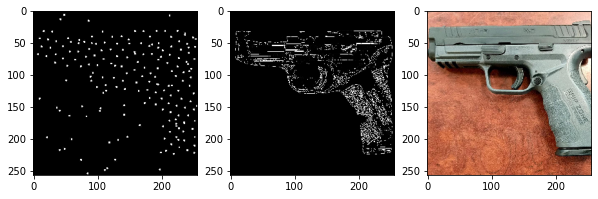


Top predictions for outline :

spider web, 23.53%
nematode, 4.18%
revolver, 2.53%
barn spider, 2.46%
park bench, 2.27%

Top predictions for final_easy :

spotlight, 29.64%
bubble, 14.78%
spider web, 5.25%
wine bottle, 3.42%
fountain, 2.47%

Top predictions for original :

revolver, 85.93%
assault rifle, 8.22%
rifle, 5.07%
holster, 0.6%
power drill, 0.12%


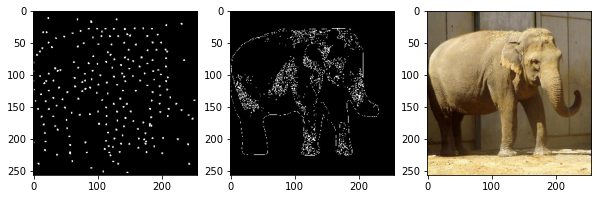


Top predictions for outline :

spider web, 93.47%
lampshade, 0.83%
barn spider, 0.74%
bubble, 0.74%
fountain, 0.56%

Top predictions for final_easy :

spotlight, 21.99%
spider web, 17.99%
bubble, 15.16%
fountain, 3.42%
lampshade, 3.09%

Top predictions for original :

Indian elephant, 86.83%
African elephant, 7.55%
tusker, 5.61%
Arabian camel, 0.0%
hippopotamus, 0.0%


In [21]:
# Prepare the inputs
#image, class_id = cifar100[3637]
n = 5

for i in range(n):
    objectId = list(pictures.keys())[i]
    constellationImage = pictures[objectId]["final_easy"][0]
    outlineImage = pictures[objectId]["outline"][0]
    originalImage = pictures[objectId]["original"][0]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
    axes[0].imshow(constellationImage)
    axes[1].imshow(outlineImage)
    axes[2].imshow(originalImage)
    plt.show()

    for image_type in ["outline", "final_easy","original"]:

        image = PIL.Image.fromarray(pictures[objectId][image_type][0])
        
        
        preprocess = transforms.Compose([
            transforms.Resize(256),
        #    transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

        # move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        with torch.no_grad():
            # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
            output = model(input_batch)
        
        #print(output[0])
        # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        
        # Show top categories per image
        print("\nTop predictions for", image_type, ":\n")
        top5_prob, top5_catid = torch.topk(probabilities, 5)
        for i in range(top5_prob.size(0)):
            print(f"{categories[top5_catid[i]]}, {round(top5_prob[i].item()*100,2)}%")